# Install Package, Library, dan Dependencies

In [110]:
!pip install numpy panda scipy mlxtend seaborn matplotlib scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load & Check Data

In [122]:
# modules we'll use
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
missing_value = ["N/a", "na", " ", np.nan]
df = pd.read_csv("final_dataset.csv", na_values=missing_value)
bmi_data = pd.read_csv("final_dataset.csv", na_values=missing_value)

# set seed for reproducibility
np.random.seed(0) 

In [113]:
df.sample(5)

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
398,88.534129,1.802767,27.241546,Female,48,over weight,5
3833,59.347913,1.501844,26.312115,Female,20,over weight,5
4836,56.384719,1.797400,17.453082,Male,63,mild thinness,3
4572,51.562440,1.723281,17.362863,Male,25,mild thinness,3
636,67.314685,1.814513,20.445128,Female,48,normal,4


In [114]:
bmi_data.sample(5)

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
597,103.077170,1.818442,31.171933,Female,36,severe obese,7
332,74.968621,1.588548,29.708358,Female,37,over weight,5
521,58.632309,1.401810,29.837249,Female,43,over weight,5
3935,99.703186,1.877631,28.280589,Male,63,over weight,5
4800,51.031971,1.503587,22.572774,Female,18,normal,4


In [115]:
df.head(10)

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5
5,99.041248,1.852778,28.851569,Male,46,over weight,5
6,62.347337,1.543259,26.178219,Female,35,over weight,5
7,89.725906,1.825480,26.925498,Male,24,over weight,5
8,62.038769,1.475992,28.477054,Female,19,over weight,5
9,67.675612,1.536075,28.681847,Female,38,over weight,5


In [116]:
df.shape

(5000, 7)

In [117]:
df.dtypes

Weight                          float64
Height                          float64
BMI                             float64
Gender                           object
Age                               int64
BMIcase                          object
Exercise Recommendation Plan      int64
dtype: object

In [118]:
df.nunique()

Weight                          5000
Height                          5000
BMI                             5000
Gender                             2
Age                               48
BMIcase                            7
Exercise Recommendation Plan       7
dtype: int64

Text(0.5, 1.0, 'BMI distribution')

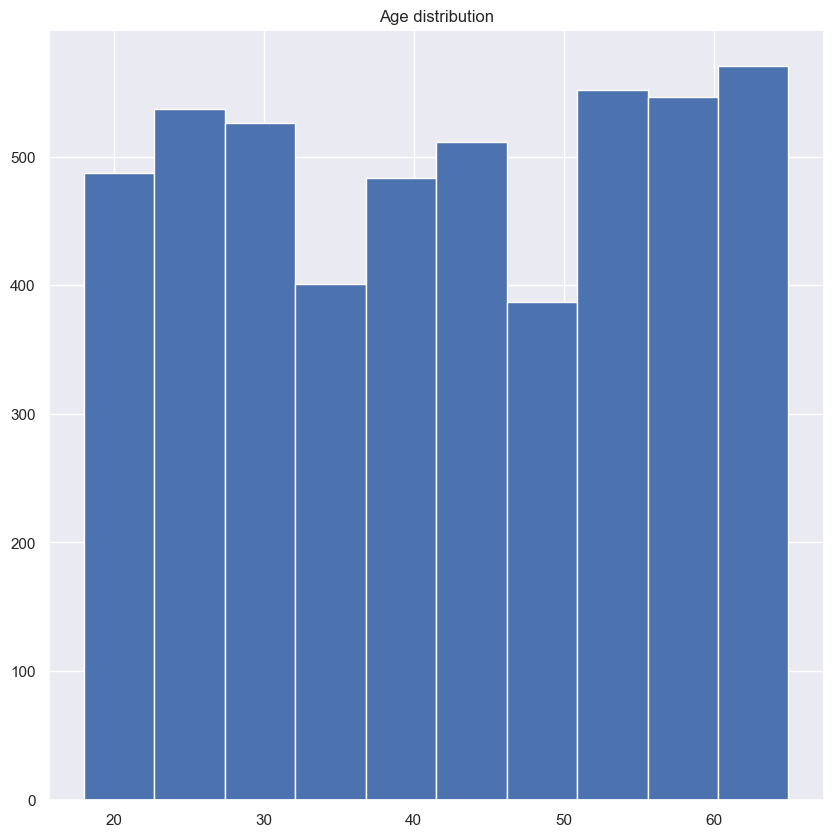

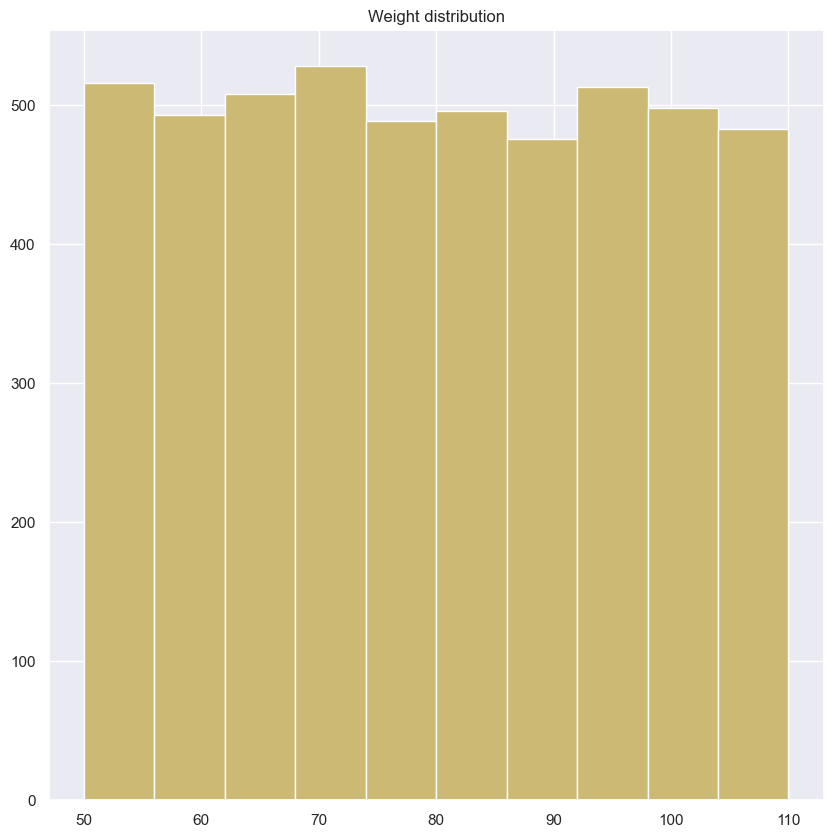

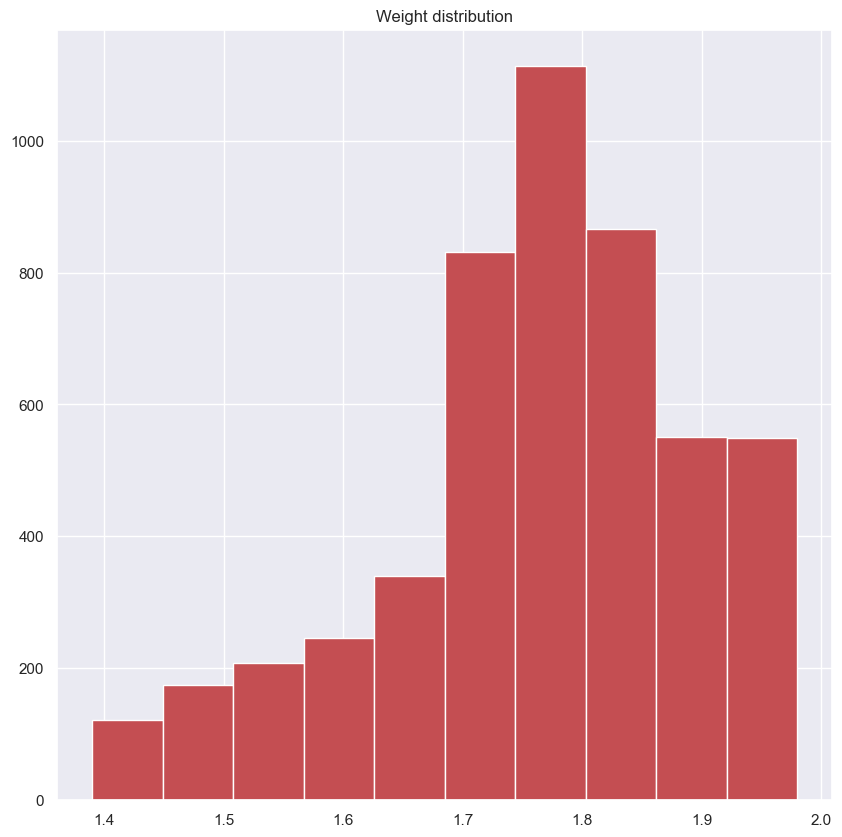

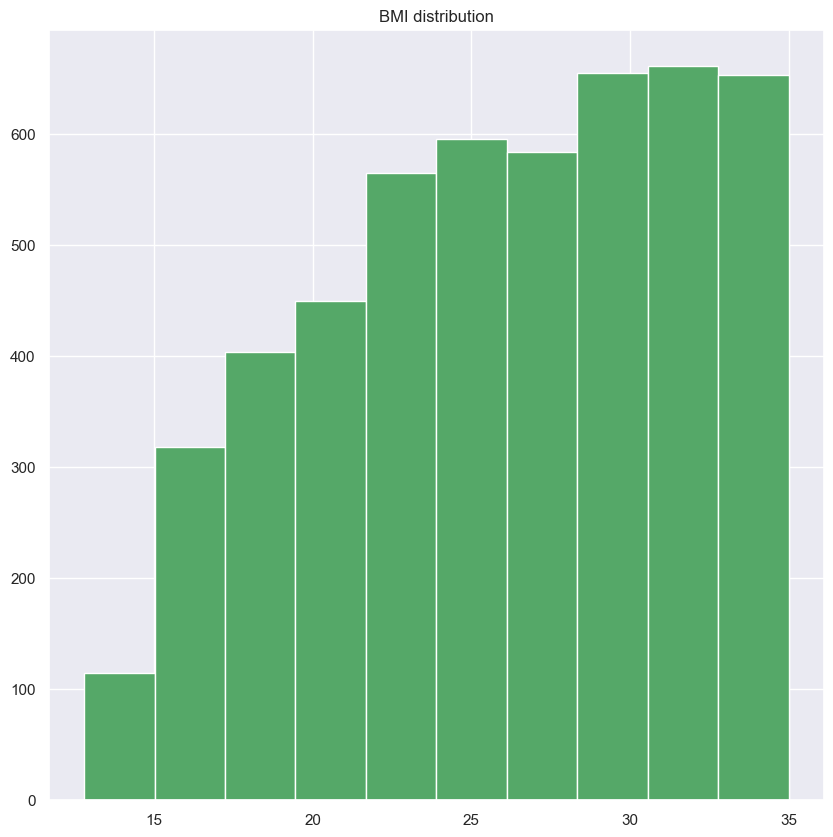

In [119]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='b')
plt.title("Age distribution")

plt.figure(figsize=(10,10))
plt.hist(df['Weight'],color='y')
plt.title("Weight distribution")

plt.figure(figsize=(10,10))
plt.hist(df['Height'],color='r')
plt.title("Weight distribution")

plt.figure(figsize=(10,10))
plt.hist(df['BMI'],color='g')
plt.title("BMI distribution")

# Handle Missing Data

In [120]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

In [121]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

In [125]:
df[['BMI']]

,BMI
0,29.719488
1,23.997776
2,24.987499
3,31.720047
4,25.673756
...,...
4995,26.549697
4996,33.688435
4997,15.158221
4998,27.298892


# Scaling Data & Normalisasi Data

In [129]:
# ekstrak
bmi_kolom = df[['BMI']]

# Inisiasi Scaler
scaler = MinMaxScaler()

# fit and transform the data
normalized_bmi = scaler.fit_transform(bmi_kolom)
bmi = pd.DataFrame(normalized_bmi, columns=['BMI'])

# perbarui bmi_data dan mulai makai itu saja
bmi_data['BMI'] = bmi['BMI']

In [130]:
df

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5
...,...,...,...,...,...,...,...
4995,55.256111,1.442648,26.549697,Female,23,over weight,5
4996,106.683815,1.779544,33.688435,Female,65,severe obese,7
4997,55.645396,1.915978,15.158221,Male,26,sever thinness,1
4998,83.748623,1.751525,27.298892,Female,55,over weight,5


In [131]:
bmi_data

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,0.762330,Female,59,over weight,5
1,61.089124,1.595499,0.504661,Female,25,normal,4
2,82.454037,1.816538,0.549232,Female,50,normal,4
3,101.713306,1.790696,0.852423,Female,62,obese,6
4,99.609527,1.969726,0.580136,Male,57,over weight,5
...,...,...,...,...,...,...,...
4995,55.256111,1.442648,0.619583,Female,23,over weight,5
4996,106.683815,1.779544,0.941066,Female,65,severe obese,7
4997,55.645396,1.915978,0.106584,Male,26,sever thinness,1
4998,83.748623,1.751525,0.653322,Female,55,over weight,5


# Visualisasi Data Akhir & Finding Korelasi

<Axes: >

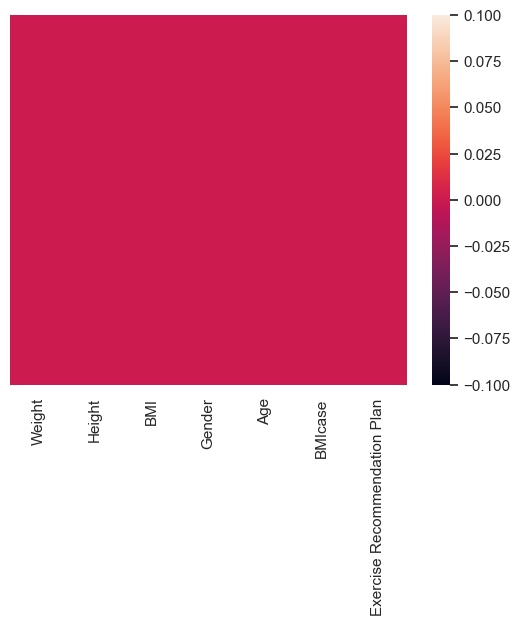

In [132]:
sns.heatmap(bmi_data.isnull(), yticklabels=False)

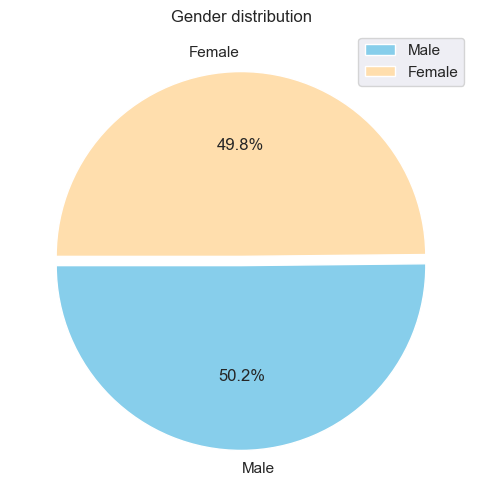

In [136]:
plt.figure(figsize=(12,6))
plt.title("Gender distribution")
g = plt.pie(bmi_data.Gender.value_counts(), explode=(0.025,0.025), labels=bmi_data.Gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>]],
      dtype=object)

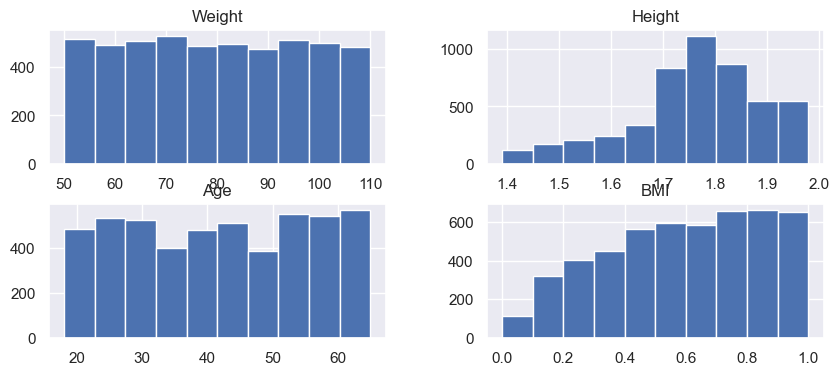

In [137]:
features = ["Weight", "Height", "Age", "BMI"]
bmi_data[features].hist(figsize=(10, 4))

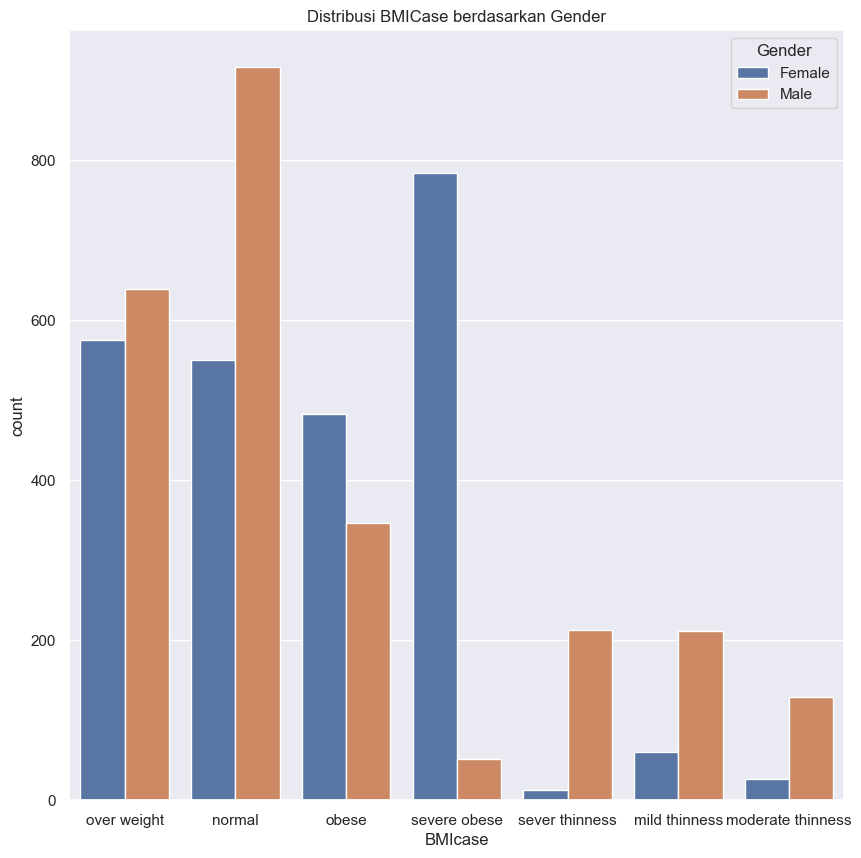

In [138]:
plt.figure(figsize=(10,10))
sns.countplot(data=bmi_data, x='BMIcase', hue='Gender')
plt.title("Distribusi BMICase berdasarkan Gender")
plt.show()

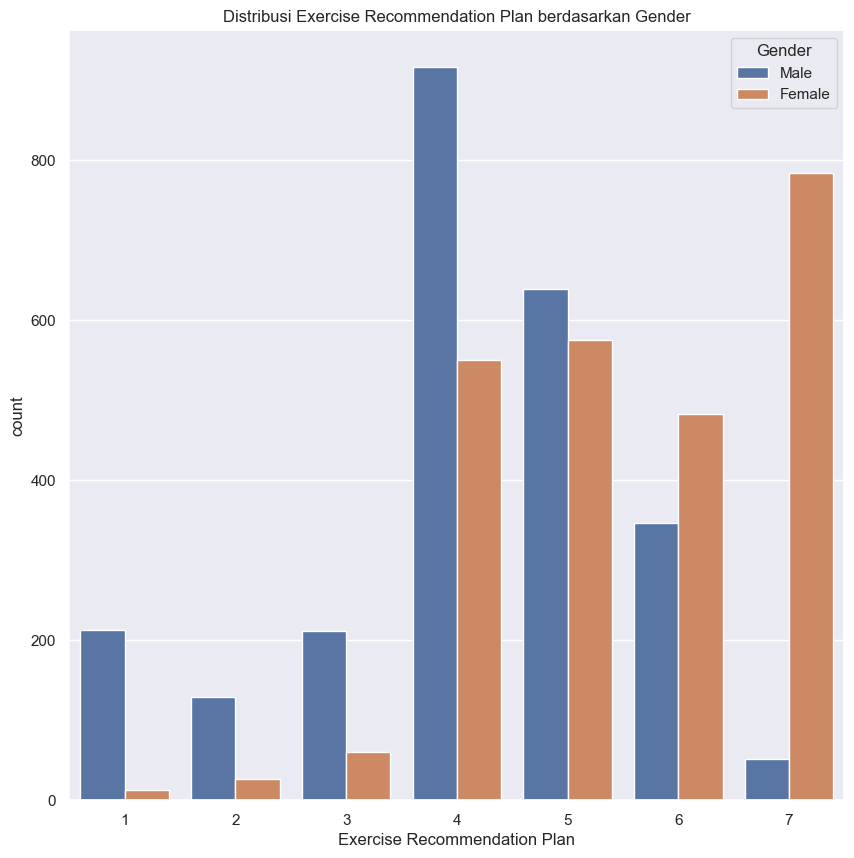

In [139]:
plt.figure(figsize=(10,10))
sns.countplot(data=bmi_data, x='Exercise Recommendation Plan', hue='Gender')
plt.title("Distribusi Exercise Recommendation Plan berdasarkan Gender")
plt.show()

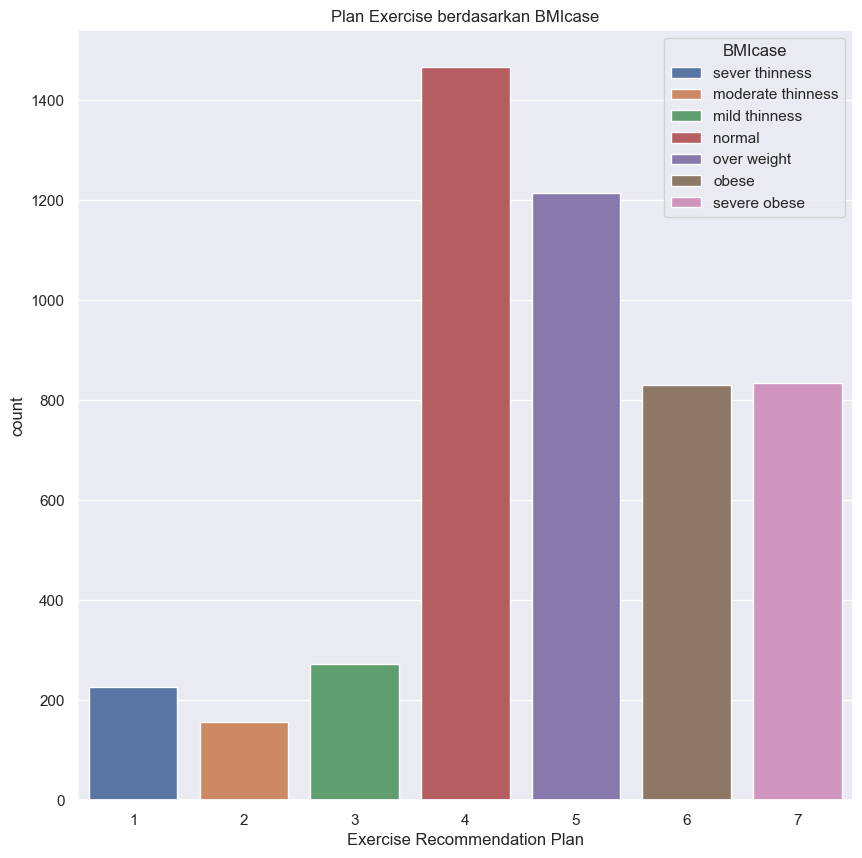

In [140]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Exercise Recommendation Plan", hue="BMIcase", data=bmi_data)
plt.title("Plan Exercise berdasarkan BMIcase")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14236\3272520963.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14236\3272520963.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bmi_data['BMI'], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

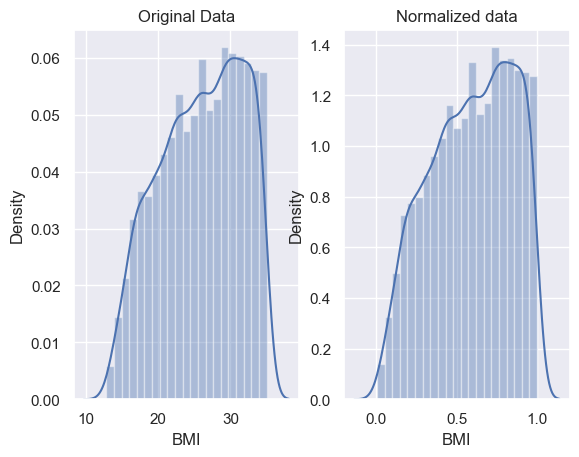

In [153]:
# plot both together to compare df & bmi_data 
fig, ax=plt.subplots(1,2)
sns.distplot(df['BMI'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(bmi_data['BMI'], ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
# For now this is it

# Selesai Disini Untuk Sekarang